In [2]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [3]:
# Importamos las bibliotecas básicas que necesitaremos
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import ttest_ind

In [8]:
# Load the data

df = pd.read_csv('ensanut2020.csv', delimiter=';', encoding='utf-8')
print(df.columns)
df.shape

Index(['FOLIO_I', 'FOLIO_INT', 'ID_INT', 'estrato', 'region_cv', 'est_sel',
       'Upm', 'ENTIDAD', 'DESC_ENT', 'municipio', 'desc_mun', 'maquina',
       'hora_ini_1', 'fecha_ini_1', 'hora_fin_1', 'fecha_fin_1', 'tiempo1',
       'resultado_1', 'hora_ini_2', 'fecha_ini_2', 'hora_fin_2', 'fecha_fin_2',
       'tiempo2', 'resultado_2', 'hora_ini_3', 'fecha_ini_3', 'hora_fin_3',
       'fecha_fin_3', 'tiempo3', 'resultado_3', 'hora_ini_4', 'fecha_ini_4',
       'hora_fin_4', 'fecha_fin_4', 'tiempo4', 'resultado_4', 'hora_ini',
       'fecha_ini', 'localizado', 'H0902A', 'H0302', 'H0303', 'H0304', 'MESES',
       'VIVO', 'sv', 'scv', 'nota1', 'nota01', 'san01', 'san02', 'san04',
       'Etiqueta', 'comentario', 'tiempo', 'hora_fin', 'fecha_fin', 'completa',
       'otroent', 'Sexo', 'Edad', 'valor.AAT', 'fecdeterm.AAT',
       'valor.AC_URICO', 'fecdeterm.AC_URICO', 'valor.ALBUM',
       'fecdeterm.ALBUM', 'valor.ALT', 'fecdeterm.ALT', 'valor.COL_HDL',
       'fecdeterm.COL_HDL', 'valor.

(2373, 93)

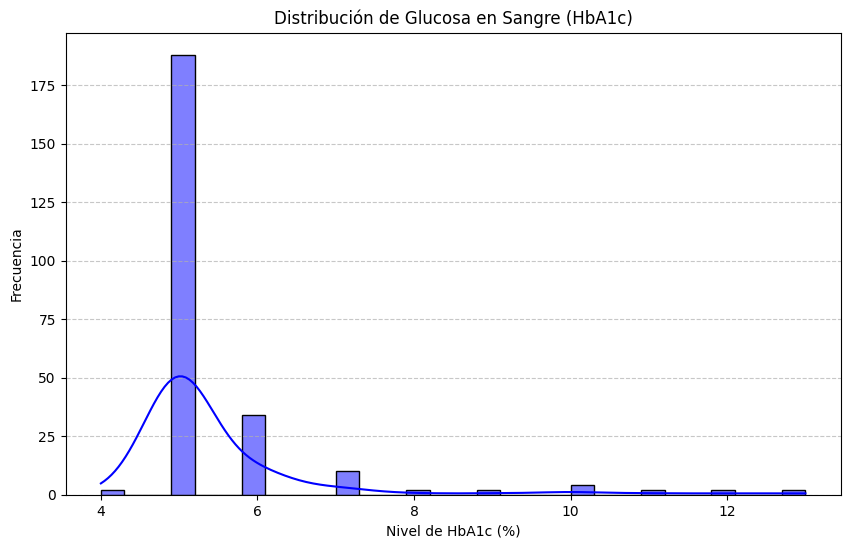

In [9]:
glucosa_columna = 'HB1AC.Valor'
df_glucosa = df[glucosa_columna].dropna()


# Limpiar la columna de glucosa eliminando espacios, valores vacíos, y caracteres no deseados
df_glucosa = df_glucosa.replace(r'^\s*$', np.nan, regex=True)  # Reemplazar espacios en blanco o valores vacíos con NaN

# Convertir la columna a valores numéricos, ignorando los errores para evitar problemas con valores no válidos
df_glucosa = pd.to_numeric(df_glucosa, errors='coerce').dropna()

# Crear un histograma para visualizar la distribución de los niveles de glucosa (HbA1c)
plt.figure(figsize=(10, 6))
sns.histplot(df_glucosa, kde=True, bins=30, color='blue')
plt.title('Distribución de Glucosa en Sangre (HbA1c)')
plt.xlabel('Nivel de HbA1c (%)')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

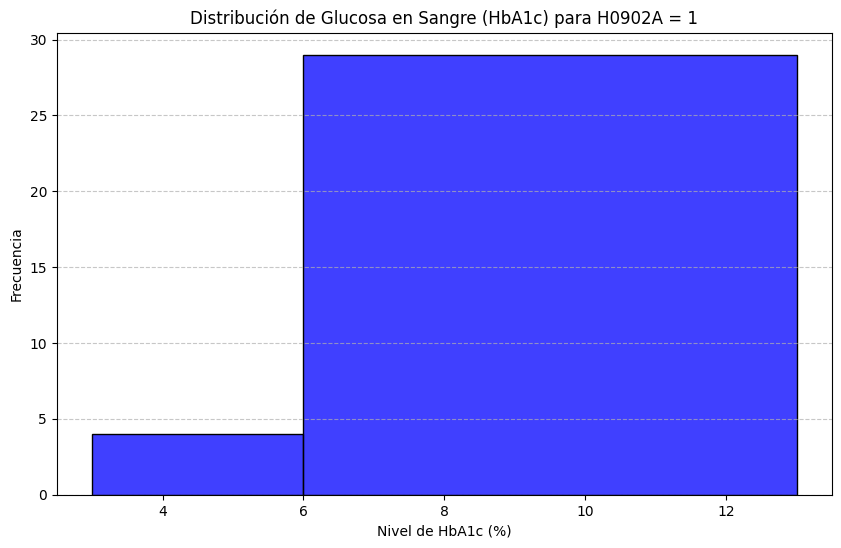

In [24]:
glucosa_columna = 'HB1AC.Valor'
# Filtrar el DataFrame para incluir solo las filas donde H0902A == 1
df_filtrado = df[df['H0902A'] == 1]

# Seleccionar la columna de glucosa y eliminar valores nulos o vacíos
df_glucosa = df_filtrado[glucosa_columna].dropna()

# Limpiar la columna de glucosa eliminando espacios, valores vacíos, y caracteres no deseados
df_glucosa = df_glucosa.replace(r'^\s*$', np.nan, regex=True)  # Reemplazar espacios en blanco o valores vacíos con NaN

# Convertir la columna a valores numéricos, ignorando los errores para evitar problemas con valores no válidos
df_glucosa = pd.to_numeric(df_glucosa, errors='coerce').dropna()

# Crear un histograma para visualizar la distribución de los niveles de glucosa (HbA1c) con dos bins: 0-7 y >7
plt.figure(figsize=(10, 6))
bins = [3, 6, df_glucosa.max()]
sns.histplot(df_glucosa, bins=bins, kde=False, color='blue')
plt.title('Distribución de Glucosa en Sangre (HbA1c) para H0902A = 1')
plt.xlabel('Nivel de HbA1c (%)')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()




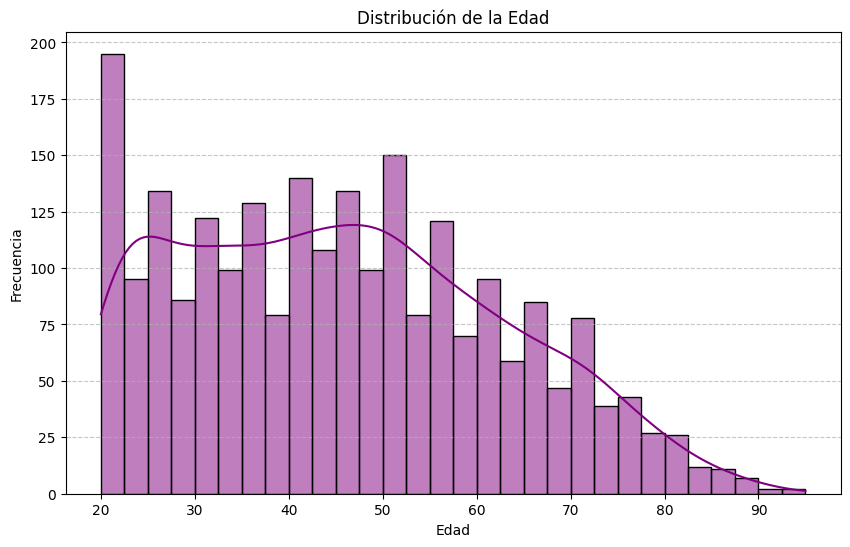

Skewness (Asimetría): 0.3335346936250369


In [4]:
# Filtrar las filas que tienen valores de edad
edad_columna = 'Edad'
df_edad = df[[edad_columna]].dropna()

# Crear un histograma para visualizar la distribución de la edad
plt.figure(figsize=(10, 6))
sns.histplot(df_edad['Edad'], kde=True, bins=30, color='purple')
plt.title('Distribución de la Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Calcular la asimetría (sesgo) de la distribución
skewness = df_edad['Edad'].skew()
print(f"Skewness (Asimetría): {skewness}")

/var/folders/b4/mywc7frs48s7h8jd17g7qv1m0000gn/T/ipykernel_54924/1672113566.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(diabetes_yes, label='Con Diabetes', shade=True, color='red')
/var/folders/b4/mywc7frs48s7h8jd17g7qv1m0000gn/T/ipykernel_54924/1672113566.py:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(diabetes_no, label='Sin Diabetes', shade=True, color='blue')


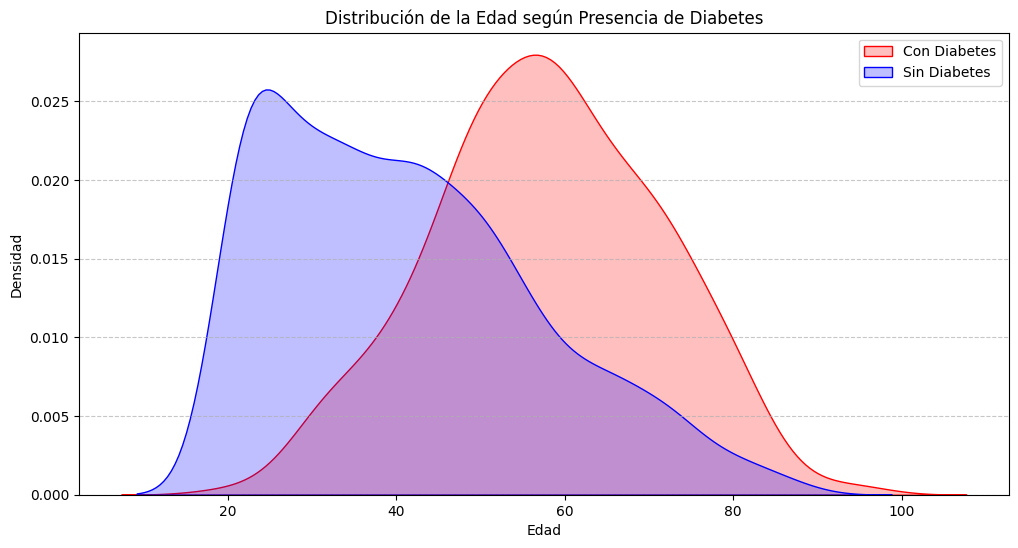

Skewness (Asimetría) Con Diabetes: -0.04964742458175178
Skewness (Asimetría) Sin Diabetes: 0.6433946920436058
T-Statistic: 19.645238773603154
P-Value: 5.238431672593461e-65
Existe una diferencia significativa en la edad entre las personas con y sin diabetes (p < 0.05).
El mean de edad de las personas con diabetes es  57.67781155015197
El mean de edad de las personas sin diabetes es  41.0945179584121


In [18]:
edad_columna = 'Edad'
diabetes_columna = 'H0902A'
df_edad_diabetes = df[[edad_columna, diabetes_columna]].dropna()


# Separar los datos por presencia de diabetes
diabetes_yes = df_edad_diabetes[df_edad_diabetes[diabetes_columna] == 1][edad_columna]
diabetes_no = df_edad_diabetes[df_edad_diabetes[diabetes_columna] == 9][edad_columna]


# Graficar la distribución de la edad para ambos grupos
plt.figure(figsize=(12, 6))
sns.kdeplot(diabetes_yes, label='Con Diabetes', shade=True, color='red')
sns.kdeplot(diabetes_no, label='Sin Diabetes', shade=True, color='blue')
plt.title('Distribución de la Edad según Presencia de Diabetes')
plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Calcular la asimetría (sesgo) de la distribución de la edad para ambos grupos
skewness_yes = diabetes_yes.skew()
skewness_no = diabetes_no.skew()
print(f"Skewness (Asimetría) Con Diabetes: {skewness_yes}")
print(f"Skewness (Asimetría) Sin Diabetes: {skewness_no}")

# Realizar una prueba t para comparar las medias de edad entre ambos grupos
t_stat, p_value = ttest_ind(diabetes_yes, diabetes_no, equal_var=False)
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")


from scipy.stats import ttest_ind, pointbiserialr

# Interpretación del resultado de la prueba t
if p_value < 0.05:
    print("Existe una diferencia significativa en la edad entre las personas con y sin diabetes (p < 0.05).")
else:
    print("No existe una diferencia significativa en la edad entre las personas con y sin diabetes (p >= 0.05).")


print('El mean de edad de las personas con diabetes es ', diabetes_yes.mean())
print('El mean de edad de las personas sin diabetes es ', diabetes_no.mean())
# Calcular la correlación punto-biserial entre edad y diabetes
#correlation, p_value_corr = pointbiserialr(df_edad_diabetes[diabetes_columna], df_edad_diabetes[edad_columna])
#print(f"Correlación punto-biserial entre Edad y Diabetes: {correlation}")
#print(f"P-Value de la correlación: {p_value_corr}")

# Interpretación del resultado de la correlación
#if p_value_corr < 0.05:
    #print("Existe una correlación significativa entre la edad y la presencia de diabetes (p < 0.05).")
#else:
    #print("No existe una correlación significativa entre la edad y la presencia de diabetes (p >= 0.05).")


C:\Users\Black\AppData\Local\Temp\ipykernel_1488\3814489922.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sexo_counts.index, y=sexo_counts.values, palette='Set2')


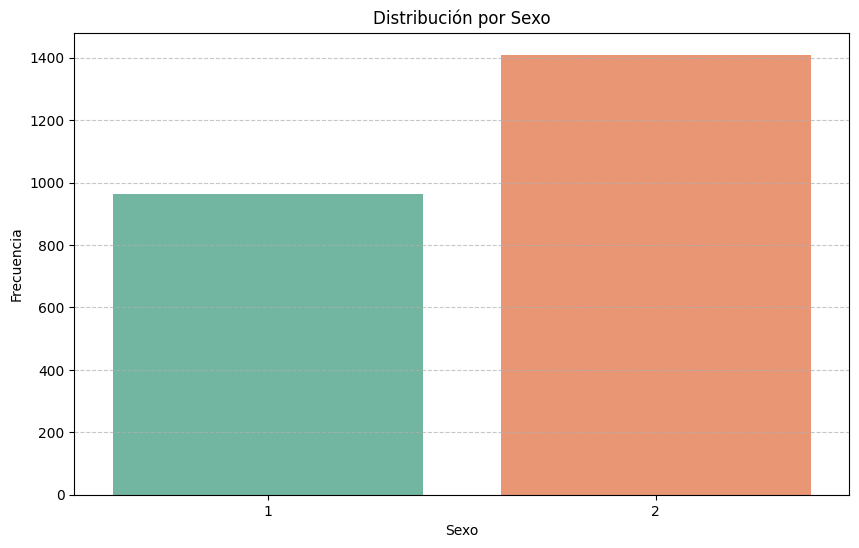

In [8]:
# Filtrar las filas que tienen valores de sexo
sexo_columna = 'Sexo'
df_sexo = df[[sexo_columna]].dropna()

# Contar la cantidad de individuos por sexo
sexo_counts = df_sexo[sexo_columna].value_counts()

# Graficar la distribución del sexo
plt.figure(figsize=(10, 6))
sns.barplot(x=sexo_counts.index, y=sexo_counts.values, palette='Set2')
plt.title('Distribución por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


/var/folders/b4/mywc7frs48s7h8jd17g7qv1m0000gn/T/ipykernel_54924/2188689146.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Diabetes (0 = No, 1 = Sí)')


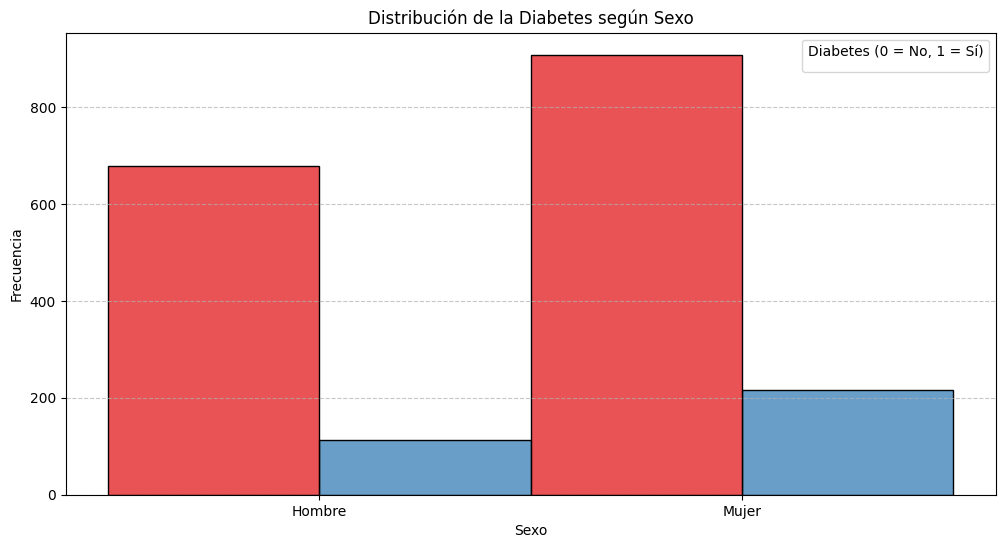

Correlación punto-biserial entre Sexo y Diabetes: -0.06462675263631384
P-Value de la correlación: 0.004655329393270851
Existe una correlación significativa entre el sexo y la presencia de diabetes (p < 0.05).


In [20]:
# Filtrar las filas que tienen valores de sexo y diabetes
sexo_columna = 'Sexo'
diabetes_columna = 'H0902A'
df_sexo_diabetes = df[[sexo_columna, diabetes_columna]].dropna()

# Filtrar solo los casos donde H0902A == 1 para indicar diabetes, y H0902A == 9 para indicar no diabetes
df_sexo_diabetes = df_sexo_diabetes[df_sexo_diabetes[diabetes_columna].isin([1, 9])]
df_sexo_diabetes[diabetes_columna] = df_sexo_diabetes[diabetes_columna].apply(lambda x: 1 if x == 1 else 0)

# Mantener los valores originales de la columna de sexo (1 para Hombre, 2 para Mujer)

# Graficar la distribución de la diabetes para ambos sexos
plt.figure(figsize=(12, 6))
sns.histplot(df_sexo_diabetes, x=sexo_columna, hue=diabetes_columna, multiple='dodge', bins=[0.5, 1.5, 2.5], kde=False, palette='Set1')
plt.xticks([1, 2], ['Hombre', 'Mujer'])
plt.title('Distribución de la Diabetes según Sexo')
plt.xlabel('Sexo')
plt.ylabel('Frecuencia')
plt.legend(title='Diabetes (0 = No, 1 = Sí)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Calcular la correlación punto-biserial entre sexo y diabetes
sexo_binario = df_sexo_diabetes[sexo_columna].apply(lambda x: 1 if x == 1 else 0)
correlation, p_value_corr = pointbiserialr(sexo_binario, df_sexo_diabetes[diabetes_columna])

# Verificar si la correlación y p_value son válidos
if not np.isnan(correlation) and not np.isnan(p_value_corr):
    print(f"Correlación punto-biserial entre Sexo y Diabetes: {correlation}")
    print(f"P-Value de la correlación: {p_value_corr}")

    # Interpretación del resultado de la correlación
    if p_value_corr < 0.05:
        print("Existe una correlación significativa entre el sexo y la presencia de diabetes (p < 0.05).")
    else:
        print("No existe una correlación significativa entre el sexo y la presencia de diabetes (p >= 0.05).")
else:
    print("No se pudo calcular la correlación punto-biserial, revise los datos de entrada.")


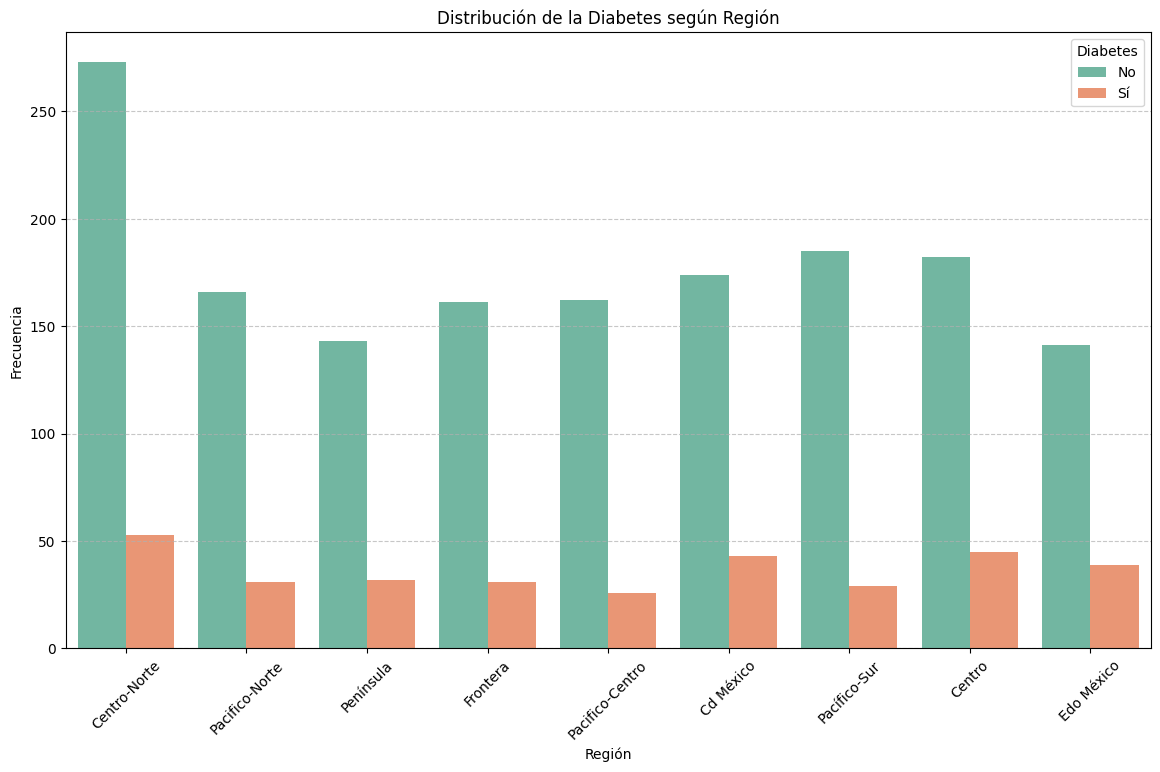

Proporción de Diabetes por Región:
region_cv
Cd México          0.198157
Centro             0.198238
Centro-Norte       0.162577
Edo México         0.216667
Frontera           0.161458
Pacifico-Centro    0.138298
Pacifico-Norte     0.157360
Pacífico-Sur       0.135514
Península          0.182857
Name: H0902A, dtype: float64
Correlación punto-biserial entre Región y Diabetes: 0.022062142484006526
P-Value de la correlación: 0.3344474599853843
No existe una correlación significativa entre la región y la presencia de diabetes (p >= 0.05).


,H0902A,region_cv
H0902A,1.000000,0.022062
region_cv,0.022062,1.000000


In [ ]:
# Filtrar las filas que tienen valores de sexo, diabetes y región

diabetes_columna = 'H0902A'
region_columna = 'region_cv'
df_region_diabetes = df[[ diabetes_columna, region_columna]].dropna()

# Filtrar solo los casos donde H0902A == 1 para indicar diabetes
df_region_diabetes = df_region_diabetes[df_region_diabetes[diabetes_columna].isin([1, 9])]
df_region_diabetes[diabetes_columna] = df_region_diabetes[diabetes_columna].apply(lambda x: 1 if x == 1 else 0)
# Diccionario de regiones
diccionario_regiones = {
    1.00: 'Pacifico-Norte',
    2.00: 'Frontera',
    3.00: 'Pacifico-Centro',
    4.00: 'Centro-Norte',
    5.00: 'Centro',
    6.00: 'Cd México',
    7.00: 'Edo México',
    8.00: 'Pacífico-Sur',
    9.00: 'Península'
}

# Reemplazar los valores numéricos por los nombres de las regiones
df_region_diabetes[region_columna] = df_region_diabetes[region_columna].map(diccionario_regiones)

# Graficar la distribución de la diabetes por región
plt.figure(figsize=(14, 8))
sns.countplot(x=region_columna, hue=diabetes_columna, data=df_region_diabetes, palette='Set2')
plt.title('Distribución de la Diabetes según Región')
plt.xlabel('Región')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.legend(title='Diabetes', labels=['No', 'Sí'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Interpretación del resultado
diabetes_por_region = df_region_diabetes.groupby(region_columna)[diabetes_columna].mean()
print("Proporción de Diabetes por Región:")
print(diabetes_por_region)

# Calcular la correlación punto-biserial entre región y diabetes
# Convertir las regiones a valores numéricos para el análisis de correlación
df_region_diabetes[region_columna] = df_region_diabetes[region_columna].apply(lambda x: list(diccionario_regiones.keys())[list(diccionario_regiones.values()).index(x)])
correlation, p_value_corr = pointbiserialr(df_region_diabetes[region_columna], df_region_diabetes[diabetes_columna])
print(f"Correlación punto-biserial entre Región y Diabetes: {correlation}")
print(f"P-Value de la correlación: {p_value_corr}")

# Interpretación del resultado de la correlación
if p_value_corr < 0.05:
    print("Existe una correlación significativa entre la región y la presencia de diabetes (p < 0.05).")
else:
    print("No existe una correlación significativa entre la región y la presencia de diabetes (p >= 0.05).")




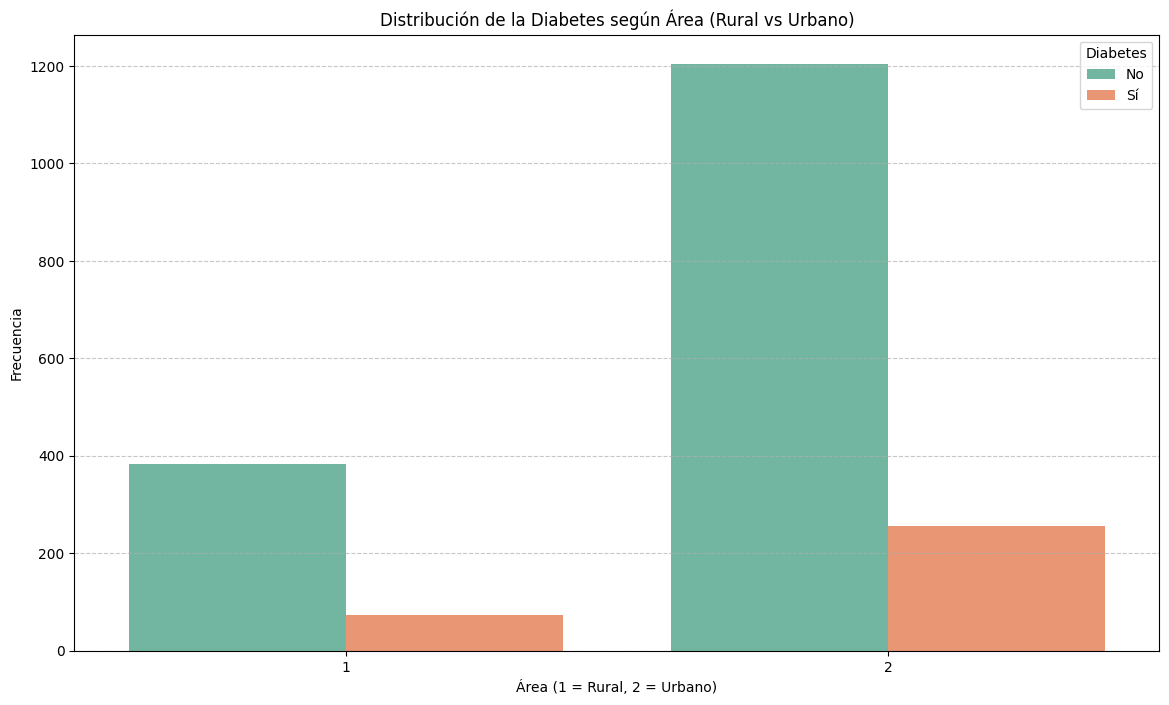

Proporción de Diabetes por Área (Rural vs Urbano):
area_20
1    0.161926
2    0.174777
Name: H0902A, dtype: float64
Correlación punto-biserial entre Área (Rural/Urbano) y Diabetes: 0.014523055081068322
P-Value de la correlación: 0.5252172508676883
No existe una correlación significativa entre el tipo de área (rural/urbano) y la presencia de diabetes (p >= 0.05).


In [23]:
# Filtrar las filas que tienen valores de sexo, diabetes, región y área

diabetes_columna = 'H0902A'
region_columna = 'region_cv'
area_columna = 'area_20'
df_area_diabetes = df[[sexo_columna, diabetes_columna, region_columna, area_columna]].dropna()

df_area_diabetes = df_area_diabetes[df_area_diabetes[diabetes_columna].isin([1, 9])]

# Filtrar solo los casos donde H0902A == 1 para indicar diabetes
df_area_diabetes = df_area_diabetes[df_area_diabetes[diabetes_columna].isin([1, 9])]
df_area_diabetes[diabetes_columna] = df_area_diabetes[diabetes_columna].apply(lambda x: 1 if x == 1 else 0)
# Convertir los valores de la columna de área (1 para Rural, 2 para Urbano)
rural = df_area_diabetes[df_area_diabetes[area_columna] == 1]
urbano = df_area_diabetes[df_area_diabetes[area_columna] == 2]

# Graficar la distribución de la diabetes por área
plt.figure(figsize=(14, 8))
sns.countplot(x=area_columna, hue=diabetes_columna, data=df_area_diabetes, palette='Set2')
plt.title('Distribución de la Diabetes según Área (Rural vs Urbano)')
plt.xlabel('Área (1 = Rural, 2 = Urbano)')
plt.ylabel('Frecuencia')
plt.legend(title='Diabetes', labels=['No', 'Sí'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Interpretación del resultado
diabetes_por_area = df_area_diabetes.groupby(area_columna)[diabetes_columna].mean()
print("Proporción de Diabetes por Área (Rural vs Urbano):")
print(diabetes_por_area)

# Calcular la correlación punto-biserial entre área y diabetes
correlation, p_value_corr = pointbiserialr(df_area_diabetes[area_columna], df_area_diabetes[diabetes_columna])
print(f"Correlación punto-biserial entre Área (Rural/Urbano) y Diabetes: {correlation}")
print(f"P-Value de la correlación: {p_value_corr}")

# Interpretación del resultado de la correlación
if p_value_corr < 0.05:
    print("Existe una correlación significativa entre el tipo de área (rural/urbano) y la presencia de diabetes (p < 0.05).")
else:
    print("No existe una correlación significativa entre el tipo de área (rural/urbano) y la presencia de diabetes (p >= 0.05).")



In [19]:
from scipy.stats import f_oneway

# Filtrar filas que tienen valores de glucosa, sexo, región y área
glucosa_columna = 'HB1AC.Valor'
sexo_columna = 'Sexo'
region_columna = 'region_cv'
area_columna = 'area_20'

# Limpiar la columna de glucosa eliminando espacios y caracteres no deseados, reemplazando valores problemáticos con NaN
df[glucosa_columna] = df[glucosa_columna].str.replace(',', '.').str.strip()  # Reemplazar comas por puntos y eliminar espacios
df[glucosa_columna] = pd.to_numeric(df[glucosa_columna], errors='coerce')  # Convertir a numérico, ignorando errores

# Filtrar filas con datos completos para glucosa, sexo, región y área
df_anova = df[[glucosa_columna, sexo_columna, region_columna, area_columna]].dropna()

# ANOVA para Sexo (1 = Hombre, 2 = Mujer)
glucosa_hombres = df_anova[df_anova[sexo_columna] == 1][glucosa_columna]
glucosa_mujeres = df_anova[df_anova[sexo_columna] == 2][glucosa_columna]

# Realizar ANOVA para comparar la media de glucosa entre hombres y mujeres
f_stat_sexo, p_value_sexo = f_oneway(glucosa_hombres, glucosa_mujeres)

print("ANOVA para Sexo:")
print(f"F-Statistic: {f_stat_sexo}")
print(f"P-Value: {p_value_sexo}")

if p_value_sexo < 0.05:
    print("Existe una diferencia significativa en los niveles de glucosa entre hombres y mujeres (p < 0.05).")
else:
    print("No existe una diferencia significativa en los niveles de glucosa entre hombres y mujeres (p >= 0.05).")

# ANOVA para Región
grupos_region = [df_anova[df_anova[region_columna] == region][glucosa_columna] for region in df_anova[region_columna].unique()]
f_stat_region, p_value_region = f_oneway(*grupos_region)

print("\nANOVA para Región:")
print(f"F-Statistic: {f_stat_region}")
print(f"P-Value: {p_value_region}")

if p_value_region < 0.05:
    print("Existe una diferencia significativa en los niveles de glucosa entre las diferentes regiones (p < 0.05).")
else:
    print("No existe una diferencia significativa en los niveles de glucosa entre las diferentes regiones (p >= 0.05).")

# ANOVA para Área (1 = Rural, 2 = Urbano)
glucosa_rural = df_anova[df_anova[area_columna] == 1][glucosa_columna]
glucosa_urbano = df_anova[df_anova[area_columna] == 2][glucosa_columna]

# Realizar ANOVA para comparar la media de glucosa entre áreas rural y urbana
f_stat_area, p_value_area = f_oneway(glucosa_rural, glucosa_urbano)

print("\nANOVA para Área (Rural vs Urbano):")
print(f"F-Statistic: {f_stat_area}")
print(f"P-Value: {p_value_area}")

if p_value_area < 0.05:
    print("Existe una diferencia significativa en los niveles de glucosa entre las áreas rural y urbana (p < 0.05).")
else:
    print("No existe una diferencia significativa en los niveles de glucosa entre las áreas rural y urbana (p >= 0.05).")



ANOVA para Sexo:
F-Statistic: 5.513216618124118
P-Value: 0.018955592583860766
Existe una diferencia significativa en los niveles de glucosa entre hombres y mujeres (p < 0.05).

ANOVA para Región:
F-Statistic: 2.3751194332688077
P-Value: 0.015136622899933902
Existe una diferencia significativa en los niveles de glucosa entre las diferentes regiones (p < 0.05).

ANOVA para Área (Rural vs Urbano):
F-Statistic: 0.4766964350646776
P-Value: 0.48999052804259935
No existe una diferencia significativa en los niveles de glucosa entre las áreas rural y urbana (p >= 0.05).
